In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housing = fetch_california_housing()

In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
housing.target_names

['MedHouseVal']

In [45]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

In [46]:
df = df.drop(['Latitude','Longitude'], axis = 1)

In [38]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Affordibility
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,Expensive
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,Expensive
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,Expensive
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,Expensive
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,Expensive


In [16]:
# Problem Statement :

# Add an column 'affordibility'

# upto 1.75     :   'Affordable'
# 1.75 to 3.00  :   'Mid-range'
# 3 +           :   'Expensive'


# 1. Apply Machine learning steps to predict Median House Value.
# 2. Apply Machine Learning steps to classify affordibility of house.


#  ~  Best Luck  ~

In [47]:
df.shape

(20640, 7)

In [48]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'MedHouseVal'],
      dtype='object')

In [49]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
MedHouseVal,0


In [50]:
df.duplicated().sum()

np.int64(0)

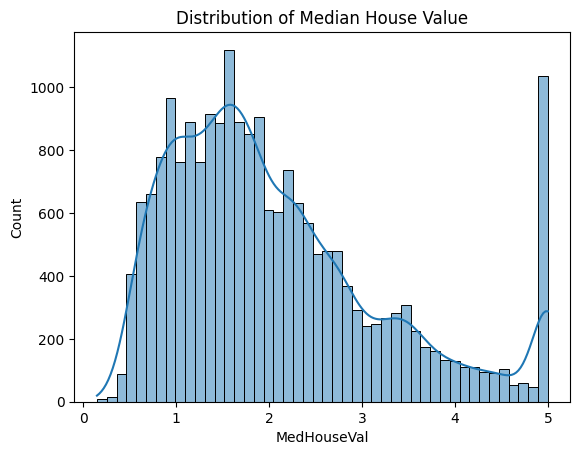

In [51]:
sns.histplot(df['MedHouseVal'], kde=True)
plt.title("Distribution of Median House Value")
plt.show()

In [52]:
def affordability_label(value):
    if value <= 1.75:
        return 'Affordable'
    elif value <= 3.00:
        return 'Mid-range'
    else:
        return 'Expensive'

df['Affordibility'] = df['MedHouseVal'].apply(affordability_label)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [54]:
df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal,Affordibility
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,4.526,Expensive


In [55]:
x = df.drop(columns=['MedHouseVal', 'Affordibility'])
y_regg = df['MedHouseVal']
y_clf = df['Affordibility']

In [56]:
x_train, x_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(x, y_regg, y_clf, test_size=0.1, random_state=123)

In [57]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [58]:
x_train_scaled.shape

(18576, 6)

In [59]:
x_test_scaled.shape

(2064, 6)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
reg_model = LinearRegression()
reg_model.fit(x_train_scaled, y_reg_train)

LinearRegression()

In [62]:
y_pred_reg = reg_model.predict(x_test_scaled)

In [63]:
print("Mean Squared Error:", mean_squared_error(y_reg_test, y_pred_reg))
print("R-squared:", r2_score(y_reg_test, y_pred_reg))

Mean Squared Error: 0.6282888517727705
R-squared: 0.5491029712831024


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train classifier
clf_model = RandomForestClassifier(random_state=123)
clf_model.fit(x_train_scaled, y_clf_train)

# Predict
y_pred_clf = clf_model.predict(x_test_scaled)

# Evaluate
print("\n🔸 Classification Results:")
print(classification_report(y_clf_test, y_pred_clf))



🔸 Classification Results:
              precision    recall  f1-score   support

  Affordable       0.79      0.84      0.81       969
   Expensive       0.76      0.66      0.71       425
   Mid-range       0.61      0.61      0.61       670

    accuracy                           0.73      2064
   macro avg       0.72      0.70      0.71      2064
weighted avg       0.73      0.73      0.72      2064



In [65]:
y_pred_reg = reg_model.predict(x_test_scaled)
y_pred_clf = clf_model.predict(x_test_scaled)

# Build a DataFrame to display results
results_df = pd.DataFrame({
    'Actual Price': y_reg_test.values,
    'Predicted Price': y_pred_reg,
    'Actual Affordibility': y_clf_test.values,
    'Predicted Affordibility': y_pred_clf
})

# Round prices for neatness
results_df['Actual Price'] = results_df['Actual Price'].round(2)
results_df['Predicted Price'] = results_df['Predicted Price'].round(2)

# Show first 10 rows
print(results_df.head(10))

   Actual Price  Predicted Price Actual Affordibility Predicted Affordibility
0          1.52             2.24           Affordable               Mid-range
1          0.99             1.66           Affordable              Affordable
2          1.34             1.93           Affordable              Affordable
3          2.32             1.56            Mid-range              Affordable
4          4.63             2.58            Expensive               Expensive
5          1.41             2.56           Affordable               Expensive
6          1.70             1.27           Affordable              Affordable
7          1.60             1.89           Affordable              Affordable
8          1.02             1.87           Affordable               Mid-range
9          1.69             1.68           Affordable              Affordable


In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Parameter grid for RandomForestRegressor (for regression task)
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200]
}

# GridSearchCV for RandomForestRegressor
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(x_train_scaled, y_reg_train)

# Best parameters found by GridSearchCV
print("Best parameters:", grid.best_params_)

# Best model performance
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
print("R²:", r2_score(y_reg_test, y_pred))
print("MSE:", mean_squared_error(y_reg_test, y_pred))


Best parameters: {'max_depth': 7, 'n_estimators': 100}
R²: 0.6811465744173499
MSE: 0.44429667947295176


In [69]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the RandomForestRegressor with the best parameters
rf_model = RandomForestRegressor(max_depth=7, n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled, y_reg_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(x_test_scaled)

# Evaluate the model
print("R² for Random Forest:", r2_score(y_reg_test, y_pred_rf))
print("MSE for Random Forest:", mean_squared_error(y_reg_test, y_pred_rf))


R² for Random Forest: 0.6813835260488115
MSE for Random Forest: 0.44396650637582513


In [72]:
import pickle

# Save the model using pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)


In [73]:
#pip install flask